<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/SGA_unit6_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/sample_data/spam_or_not_spam.zip')
print(df.shape)
df.head()

(3000, 2)


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
# рассчитайте частоты для классов : 
df['label'].value_counts(normalize=True)

0    0.833333
1    0.166667
Name: label, dtype: float64

In [10]:
df.groupby('label').count()

,email
label,
0,2500
1,499


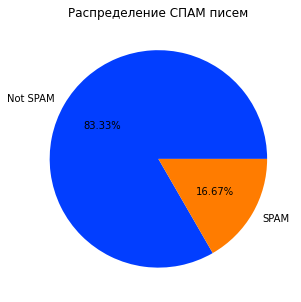

In [ ]:
# визуализируйте результат: 
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Распределение СПАМ писем')

labels = ['Not SPAM', 'SPAM']
colors = sns.color_palette('bright')[ 0:2 ]

#create pie chart
ax = plt.pie(df['label'].value_counts(), labels=labels, colors=colors, autopct='%.2f%%')



## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [11]:
print(f'Количество пустых писем в данных равно {df.email.isna().sum()}')

#Заменим все пустоты (пустые строки) в данных на пропуски (NaN)
df.fillna
df.dropna(inplace=True)

print(f'Количество пустых писем в данных после удаления пропусков равно {df.email.isna().sum()}')

Количество пустых писем в данных равно 1
Количество пустых писем в данных после удаления пропусков равно 0


Переводим данные в векторный вид:

In [12]:
vectorizer = CountVectorizer()
X_vector = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [16]:
print(f'признаков в нашем наборе данных {X_vector.shape[1]}')

признаков в нашем наборе данных 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [14]:
X = pd.DataFrame(X_vector.todense(), columns=vectorizer.get_feature_names_out())
X = X.rename(columns={'label': 'label1', 'email': 'email1'})
y = df['label'].reset_index(drop=True)
full_data = pd.concat([X, y], axis=1)

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [19]:
y_test.mean()

0.164

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [20]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.01)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = model.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Train Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Train Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"Train F1-score: {f1_score(y_train, y_train_pred):.4f}")
print('----------')
y_test_pred = model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"Test F1-score: {f1_score(y_test, y_test_pred):.4f}")

Train Accuracy: 0.9969
Train Precision: 1.0000
Train Recall: 0.9814
Train F1-score: 0.9906
----------
Test Accuracy: 0.9960
Test Precision: 0.9918
Test Recall: 0.9837
Test F1-score: 0.9878


Нарисуйте ROC-кривую:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


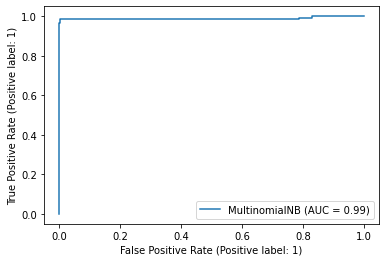

In [30]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test);

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 0, 1, 10]}

grid_search = GridSearchCV(
    estimator = MultinomialNB(), 
    param_grid=param_grid,  
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train) 
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.4f}'.format(f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 1.15 s, sys: 362 ms, total: 1.51 s
Wall time: 21 s
f1_score на тестовом наборе: 0.9836
Наилучшие значения гиперпараметров: {'alpha': 0.1}


In [55]:
#Выведем все метрики F1 для разных параметров alpha
f1_results = list(grid_search.cv_results_['mean_test_score'])
alpha = [0.01, 0.1, 0, 1, 10]

cv_optimize = pd.DataFrame({'alpha' : alpha, 'f1_results' : f1_results})

In [56]:
cv_optimize

,alpha,f1_results
0,0.01,0.985775
1,0.10,0.989776
2,0.00,0.969769
3,1.00,0.987108
4,10.00,0.875062


[None]

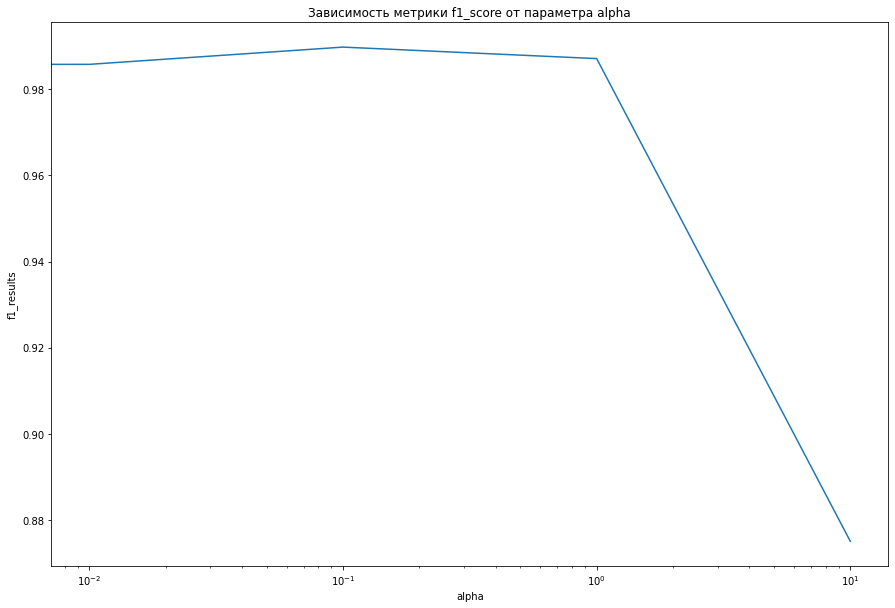

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Зависимость метрики f1_score от параметра alpha')

ax = sns.lineplot(data = cv_optimize, x='alpha', y='f1_results')
ax.set(xscale='log')

ВЫВОД:
 Получили отличный распознаватель СПАМ писем с результатом в точности под 99% с почти идеальной ROC-curve. Провели оптимизацию гипперпараметра "alpha", получим примерно одинаковые значения в интервале от 0,01 до 0.